In [1]:
import hydra
from omegaconf import DictConfig, OmegaConf

# sorrel imports
from sorrel.examples.leakyemotions.agents import LeakyEmotionsAgent, Wolf
from sorrel.examples.leakyemotions.entities import EmptyEntity
from sorrel.examples.leakyemotions.env import LeakyEmotionsEnv, ENTITY_LIST
from sorrel.examples.leakyemotions.world import LeakyEmotionsWorld
from sorrel.examples.leakyemotions.wolf_model import WolfModel
from sorrel.action.action_spec import ActionSpec
from sorrel.models.human_player import HumanPlayer, HumanObservation

### Human player test for the model

In [2]:
def main():
    config = OmegaConf.create({
        "experiment": {
            "epochs": 1,
            "max_turns": 50,
            "record_period": 50,
        },
        "model": {
            "agent_vision_radius": 3,
            "epsilon_decay": 0.0001,
        },
        "world": {
            "agents": 2,
            "height": 9,
            "width": 9,
            "layers": 3,
            "spawn_prob": 0.02,
        },
    })

    world = LeakyEmotionsWorld(config=config, default_entity=EmptyEntity())
    env = LeakyEmotionsEnv(world, config)
    agents = env.agents

    observation_spec = HumanObservation(
        entity_list=ENTITY_LIST,
        full_view=True,
        env_dims=(config.world.height, config.world.width),
    )
    action_spec = ActionSpec(["up", "down", "left", "right"])
    agents[-2] = LeakyEmotionsAgent(
        observation_spec=observation_spec,
        action_spec=action_spec,
        model=HumanPlayer(
            input_size=(config.world.height, config.world.width, config.world.layers),
            action_space=action_spec.n_actions,
            memory_size=1,
        ),
    )

    env.override_agents(agents=agents)
    env.run_experiment()
    return env

### Turn taking loop
Choose an action from [0, 1, 2, 3] to act on the environment.

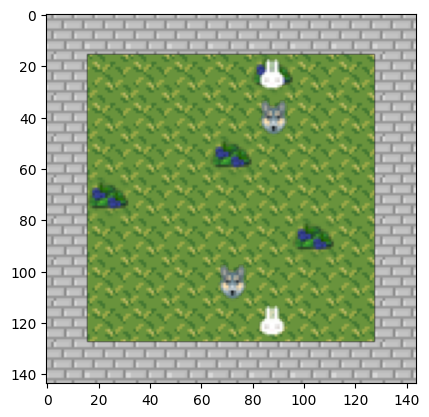

╔══════════════╦══════════════╦══════════════╗
║ Epoch:     0 ║ Loss:    0.0 ║ Reward:-205.0 ║
╚══════════════╩══════════════╩══════════════╝
╠══════════════╬══════════════╬══════════════╣
║ Epoch:     1 ║ Loss:    0.0 ║ Reward:  0.0 ║


In [3]:
experiment = main()

In [17]:
experiment.agents[0].model.memory.actions[0:15]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [3]:
input_size = (8, 7, 7)

In [7]:
import numpy as np

np.zeros(input_size).reshape(1, -1).shape

(1, 392)